In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# 그래프 저장 시 해상도 높게
%config InlineBackend.figure_format = 'retina'
# 한글 기본 설정(windows)
plt.rc('font', family='Malgun Gothic') # Windows
# plt.rc('font', family='AppleGothic') # Mac
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지
# warning 안 보이게 하는 설정
import warnings
warnings.filterwarnings(action='ignore') # 경고 메세지가 안 보이게 됨

In [4]:
sns.set(style='darkgrid',
        context='notebook',
        palette='Set2',
       rc={'figure.figsize':(10,3)}) # runtime configuration
plt.rc('font', family='Malgun Gothic') # Windows
plt.rc('axes', unicode_minus=False) # 축의 - 기호 깨짐 방지

In [5]:
from sklearn import datasets
bc = datasets.load_breast_cancer()
bc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
type(bc)

sklearn.utils._bunch.Bunch

In [7]:
X=pd.DataFrame(bc.data, columns=[col.replace(' ', '_') for col in bc.feature_names])
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
y=pd.DataFrame(bc.target_names[bc.target], columns=['class_distribution'])

In [9]:
y.head()

,class_distribution
0,malignant
1,malignant
2,malignant
3,malignant
4,malignant


In [10]:
bcdf=pd.concat((X, y), axis=1)
bcdf

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,class_distribution
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


In [11]:
wine = datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [12]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [13]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [14]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [15]:
data=wine.data
target=wine.target_names[wine.target]
winedf=pd.DataFrame(np.column_stack((data, target)), columns=wine.feature_names+['class'])
winedf

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.2,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.5,16.8,113.0,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,class_2
174,13.4,3.91,2.48,23.0,102.0,1.8,0.75,0.43,1.41,7.3,0.7,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.6,1.62,840.0,class_2


In [16]:
X=pd.DataFrame(wine.data, columns=wine.feature_names)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [17]:
y=pd.DataFrame(wine.target_names, columns=['class_distribution'])
y.head()

,class_distribution
0,class_0
1,class_1
2,class_2


In [18]:
winedf=pd.concat((X,y), axis=1)
winedf

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class_distribution
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,NaN
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,NaN
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,NaN
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,NaN
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,NaN


In [19]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [21]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [22]:
tips = tips.loc[:, ['sex','smoker', 'day', 'time', 'size', 'total_bill', 'tip']]

In [23]:
tips.head()

,sex,smoker,day,time,size,total_bill,tip
0,Female,No,Sun,Dinner,2,16.99,1.01
1,Male,No,Sun,Dinner,3,10.34,1.66
2,Male,No,Sun,Dinner,3,21.01,3.50
3,Male,No,Sun,Dinner,2,23.68,3.31
4,Female,No,Sun,Dinner,4,24.59,3.61


In [25]:
tips.sort_values(by='tip', ascending=True).reset_index(drop=True)

,sex,smoker,day,time,size,total_bill,tip
0,Female,Yes,Sat,Dinner,1,3.07,1.00
1,Male,Yes,Sat,Dinner,2,12.60,1.00
2,Female,Yes,Fri,Dinner,2,5.75,1.00
3,Female,No,Sat,Dinner,1,7.25,1.00
4,Female,No,Sun,Dinner,2,16.99,1.01
...,...,...,...,...,...,...,...
239,Male,No,Thur,Lunch,6,34.30,6.70
240,Male,No,Sat,Dinner,4,48.27,6.73
241,Male,No,Sat,Dinner,4,39.42,7.58
242,Male,No,Sat,Dinner,4,48.33,9.00


<Axes: >

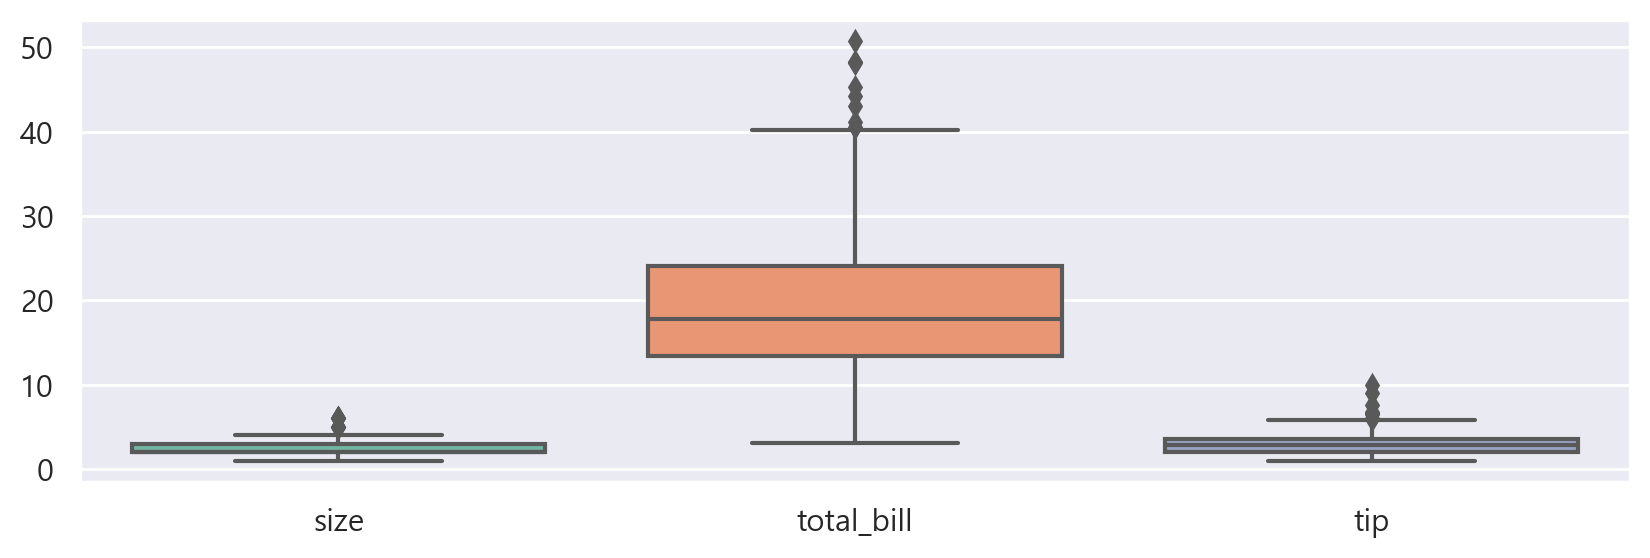

In [60]:
sns.boxplot(data=tips)

In [26]:
tips.describe(include='all')

,sex,smoker,day,time,size,total_bill,tip
count,244,244,244,244,244.000000,244.000000,244.000000
unique,2,2,4,2,NaN,NaN,NaN
top,Male,No,Sat,Dinner,NaN,NaN,NaN
freq,157,151,87,176,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.569672,19.785943,2.998279
std,NaN,NaN,NaN,NaN,0.951100,8.902412,1.383638
min,NaN,NaN,NaN,NaN,1.000000,3.070000,1.000000
25%,NaN,NaN,NaN,NaN,2.000000,13.347500,2.000000
50%,NaN,NaN,NaN,NaN,2.000000,17.795000,2.900000
75%,NaN,NaN,NaN,NaN,3.000000,24.127500,3.562500


In [62]:
tips.corr()

,size,total_bill,tip
size,1.000000,0.598315,0.489299
total_bill,0.598315,1.000000,0.675734
tip,0.489299,0.675734,1.000000


In [38]:
tips_lf=tips.melt(id_vars=['day', 'time'], var_name='변수명', value_name='값').sort_values(by=['day', 'time'])
tips_lf.reset_index(drop=True, inplace=True)
tips_lf.sample(20)

,day,time,변수명,값
135,Thur,Lunch,size,2
737,Sat,Dinner,total_bill,20.45
607,Sat,Dinner,size,2
745,Sat,Dinner,total_bill,10.07
209,Thur,Lunch,total_bill,19.08
807,Sat,Dinner,tip,2.0
768,Sat,Dinner,tip,3.27
273,Thur,Lunch,tip,2.0
232,Thur,Lunch,total_bill,16.58
687,Sat,Dinner,total_bill,16.04


In [35]:
tips_wf = tips.pivot_table(
    index=['day', 'time'],
    columns='sex',
    values='tip',
    aggfunc='mean')
tips_wf

sex              Male    Female
day  time                      
Thur Lunch   2.980333  2.561935
     Dinner       NaN  3.000000
Fri  Lunch   1.900000  2.745000
     Dinner  3.032857  2.810000
Sat  Dinner  3.083898  2.801786
Sun  Dinner  3.220345  3.367222

In [39]:
tips_wf.columns.name=None
tips_wf.reset_index()

,day,time,Male,Female
0,Thur,Lunch,2.980333,2.561935
1,Thur,Dinner,NaN,3.000000
2,Fri,Lunch,1.900000,2.745000
3,Fri,Dinner,3.032857,2.810000
4,Sat,Dinner,3.083898,2.801786
5,Sun,Dinner,3.220345,3.367222


In [25]:
ex = sns.load_dataset('exercise')
ex.sample(15)

,Unnamed: 0,id,diet,pulse,time,kind
18,18,7,no fat,87,1 min,rest
73,73,25,low fat,110,15 min,running
11,11,4,low fat,83,30 min,rest
72,72,25,low fat,94,1 min,running
28,28,10,no fat,97,15 min,rest
31,31,11,low fat,86,15 min,walking
54,54,19,no fat,97,1 min,walking
87,87,30,no fat,99,1 min,running
0,0,1,low fat,85,1 min,rest
38,38,13,low fat,93,30 min,walking


In [29]:
exgr = ex.groupby(by=ex.kind, as_index=False)['pulse'].mean()

In [30]:
exgr

,kind,pulse
0,rest,90.833333
1,walking,95.200000
2,running,113.066667


In [99]:
exgr.describe(include='all')

,kind,pulse
count,3,3.000000
unique,3,NaN
top,rest,NaN
freq,1,NaN
mean,NaN,99.700000
std,NaN,11.779974
min,NaN,90.833333
25%,NaN,93.016667
50%,NaN,95.200000
75%,NaN,104.133333


In [100]:
ex.head(3)

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest


In [103]:
ex.sample(3).sort_index()

,Unnamed: 0,id,diet,pulse,time,kind
41,41,14,low fat,100,30 min,walking
54,54,19,no fat,97,1 min,walking
87,87,30,no fat,99,1 min,running


In [102]:
ex.tail(3)

,Unnamed: 0,id,diet,pulse,time,kind
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running
89,89,30,no fat,150,30 min,running


In [104]:
exlf=ex.melt(id_vars=['pulse'], var_name='feature_names', value_name='stats').sort_values(by=['pulse'])
exlf.reset_index(drop=True)
exlf.head()

,pulse,feature_names,stats
99,80,id,4
9,80,Unnamed: 0,9
369,80,kind,rest
189,80,diet,low fat
279,80,time,1 min


In [110]:
ex.isna()

,Unnamed: 0,id,diet,pulse,time,kind
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
85,False,False,False,False,False,False
86,False,False,False,False,False,False
87,False,False,False,False,False,False
88,False,False,False,False,False,False


In [40]:
p = sns.load_dataset('penguins')
p

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [41]:
p_mean = p.groupby('species').mean()

In [42]:
p_mean

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


In [75]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [49]:
p.fillna(value=p.mean(axis=0).round(1))

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,43.9,17.2,200.9,4201.8,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.9,17.2,200.9,4201.8,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [46]:
def fillna_gr_penguins(series):
    'series의 결측치를 대체한 후 series return'
    # pd.options.mode.copy_on_write = True
    series = series.copy() # 함수 안에서 series의 결측치를 대체하여 변경하기 위해
    for col, item in series.iloc[2:-1].items(): # col : sepal_length, sepal_width, petal_length, petal_width, species
                                     # item : 값
                                     # series
                                     # items : series의 모든 값들
        if np.isnan(item): # 스칼라 데이터가 결측치인지 여부
            species = series['species'] #
            series[col] = p_mean.loc[species, col] # 종별 열별 평균값 대체
    return series
fillna_gr_penguins(p.iloc[339])

species                  Gentoo
island                   Biscoe
bill_length_mm        47.504878
bill_depth_mm         14.982114
flipper_length_mm    217.186992
body_mass_g          5076.01626
sex                         NaN
Name: 339, dtype: object

In [47]:
p_mean_applied= p.apply(fillna_gr_penguins, axis=1)

In [48]:
p_new= p_mean_applied.round(1)

In [50]:
p_new

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,38.8,18.3,190.0,3700.7,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,47.5,15.0,217.2,5076.0,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [51]:
p_new.sex.fillna(method='ffill', inplace=True)

In [52]:
p_new

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,38.8,18.3,190.0,3700.7,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,47.5,15.0,217.2,5076.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [53]:
p_new.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,344.000000,344.000000,344.000000,344.000000,344
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,177
mean,NaN,NaN,43.917442,17.148256,200.930814,4202.839244,NaN
std,NaN,NaN,5.454085,1.973423,14.060551,801.461226,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.200000,15.575000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.250000,4756.250000,NaN


In [55]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [56]:
data=iris.data
target=iris.target_names[iris.target]
irisdf=pd.DataFrame(np.column_stack((data, target)), columns=iris.feature_names+['species'])
irisdf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [57]:
irisdf.columns=[col[:-5].replace(' ', '_') for col in iris.feature_names]+['species']
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [58]:
irisdf.columns=['꽃받침길이','꽃받침너비','꽃잎길이','꽃잎너비','종']
irisdf.head(1)

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,종
0,5.1,3.5,1.4,0.2,setosa


In [59]:
print(irisdf.columns.name)

None


In [60]:
irisdf.columns.name='통계'

In [63]:
irisdf.columns=[['길이', '너비', '길이', '너비', '종류'],['꽃받침길이','꽃받침너비','꽃잎길이','꽃잎너비','종']]
irisdf.columns.names=['대분류', '소분류']
irisdf

대분류,길이,너비,길이,너비,종류
소분류,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica


In [71]:
irisdf['종류','종'].count()

150

In [74]:
irisdf.loc[irisdf[('종류','종')]==('virginica')].count()

대분류  소분류  
길이   꽃받침길이    50
너비   꽃받침너비    50
길이   꽃잎길이     50
너비   꽃잎너비     50
종류   종        50
dtype: int64

In [77]:
irisdf.columns=[col[:-5].replace(' ', '_') for col in iris.feature_names]+['species']
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [78]:
irisdf[irisdf.species=='setosa'].count()

sepal_length    50
sepal_width     50
petal_length    50
petal_width     50
species         50
dtype: int64

In [79]:
irisdf.min()

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [80]:
irisdf.iloc[:,:-1].median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [81]:
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal_length  150 non-null    object
 1   sepal_width   150 non-null    object
 2   petal_length  150 non-null    object
 3   petal_width   150 non-null    object
 4   species       150 non-null    object
dtypes: object(5)
memory usage: 6.0+ KB


In [83]:
irisdf

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [84]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [85]:
iris.mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [86]:
iris[iris.species=='versicolor'].count()

sepal_length    50
sepal_width     50
petal_length    50
petal_width     50
species         50
dtype: int64

In [87]:
iris.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [88]:
irist=iris.iloc[:,:-1]
irist.mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [89]:
irist['sepal_length'].quantile(interpolation='midpoint')

5.8

<Axes: >

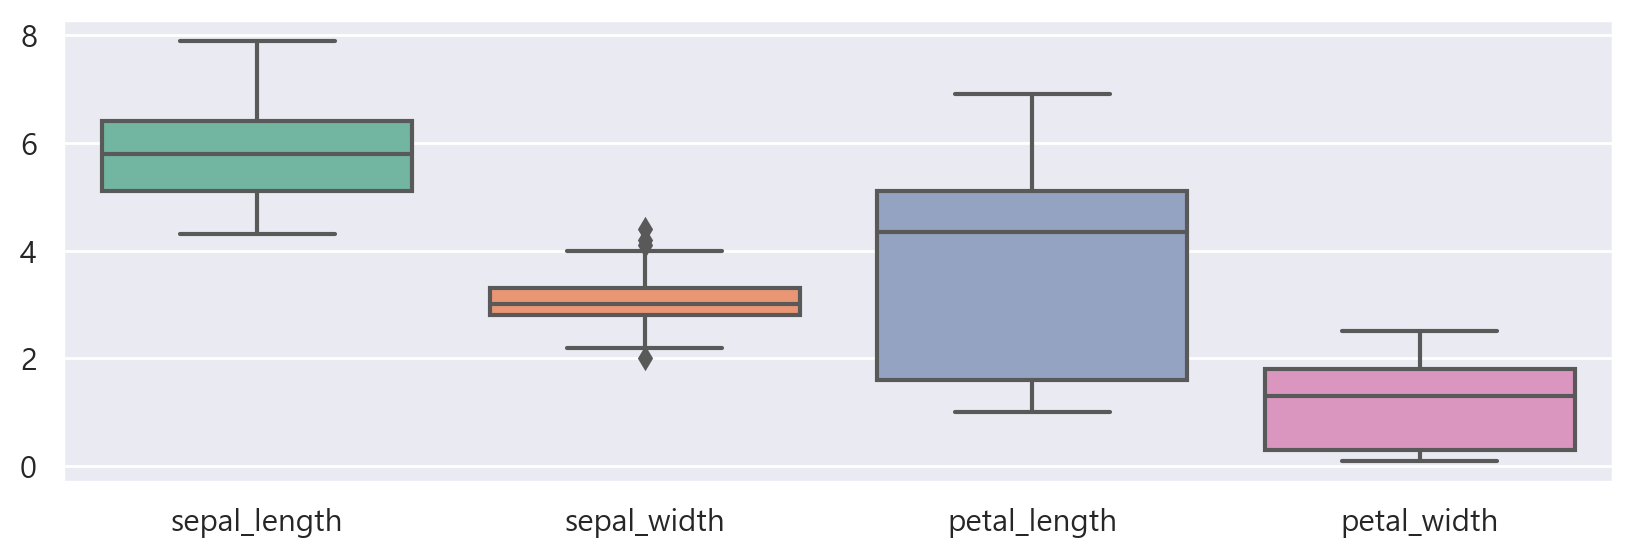

In [90]:
sns.boxplot(data=iris)

In [91]:
irist['petal_length'].rolling(5).mean()

0       NaN
1       NaN
2       NaN
3       NaN
4      1.40
       ... 
145    5.40
146    5.38
147    5.40
148    5.30
149    5.18
Name: petal_length, Length: 150, dtype: float64

In [92]:
irist.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [93]:
irist.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [94]:
irist.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [95]:
irisg=iris.groupby('species')

In [96]:
irisg.sum()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [97]:
irisg=iris.groupby(by=['species'], as_index=False)

In [98]:
irisg

In [99]:
irisg.mean()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


In [100]:
iris.pivot_table(index='species', aggfunc='corr')

petal_length  petal_width  sepal_length  sepal_width
species                                                                      
setosa     sepal_length      0.267176     0.278098      1.000000     0.742547
           sepal_width       0.177700     0.232752      0.742547     1.000000
           petal_length      1.000000     0.331630      0.267176     0.177700
           petal_width       0.331630     1.000000      0.278098     0.232752
versicolor sepal_length      0.754049     0.546461      1.000000     0.525911
           sepal_width       0.560522     0.663999      0.525911     1.000000
           petal_length      1.000000     0.786668      0.754049     0.560522
           petal_width       0.786668     1.000000      0.546461     0.663999
virginica  sepal_length      0.864225     0.281108      1.000000     0.457228
           sepal_width       0.401045     0.537728      0.457228     1.000000
           petal_length      1.000000     0.322108      0.864225     0.401045
           petal_width       0.322108     1.000000      0.281108     0.537728

In [101]:
np.array([[i]*25 for i in range(6)]).ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [102]:
iris['nr']=np.array([[i]*25 for i in range(6)]).ravel()

In [103]:
iris.iloc[::25]

,sepal_length,sepal_width,petal_length,petal_width,species,nr
0,5.1,3.5,1.4,0.2,setosa,0
25,5.0,3.0,1.6,0.2,setosa,1
50,7.0,3.2,4.7,1.4,versicolor,2
75,6.6,3.0,4.4,1.4,versicolor,3
100,6.3,3.3,6.0,2.5,virginica,4
125,7.2,3.2,6.0,1.8,virginica,5


In [104]:
r = iris.groupby(by=['species', 'nr']).sum()
r

sepal_length  sepal_width  petal_length  petal_width
species    nr                                                      
setosa     0          125.7         87.0          36.5          6.2
           1          124.6         84.4          36.6          6.1
versicolor 2          150.3         69.4         107.8         33.6
           3          146.5         69.1         105.2         32.7
virginica  4          164.4         73.2         141.0         51.1
           5          165.0         75.5         136.6         50.2

In [105]:
iris.groupby(by='species').describe(include='all').T

species                setosa  versicolor  virginica
sepal_length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
sepal_width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
petal_length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
petal_width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000
nr           count  50.000000   50.000000  50.000000
             mean    0.500000    2.500000   4.500000
             std     0.505076    0.505076   0.505076
             min     0.000000    2.000000   4.000000
             25%     0.000000    2.000000   4.000000
             50%     0.500000    2.500000   4.500000
             75%     1.000000    3.000000   5.000000
             max     1.000000    3.000000   5.000000

In [106]:
irisg.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,nr
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
50,7.0,3.2,4.7,1.4,versicolor,2
51,6.4,3.2,4.5,1.5,versicolor,2
52,6.9,3.1,4.9,1.5,versicolor,2
100,6.3,3.3,6.0,2.5,virginica,4
101,5.8,2.7,5.1,1.9,virginica,4
102,7.1,3.0,5.9,2.1,virginica,4


In [107]:
irisg.sample(3).sort_index()

,sepal_length,sepal_width,petal_length,petal_width,species,nr
18,5.7,3.8,1.7,0.3,setosa,0
46,5.1,3.8,1.6,0.2,setosa,1
48,5.3,3.7,1.5,0.2,setosa,1
59,5.2,2.7,3.9,1.4,versicolor,2
74,6.4,2.9,4.3,1.3,versicolor,2
81,5.5,2.4,3.7,1.0,versicolor,3
117,7.7,3.8,6.7,2.2,virginica,4
136,6.3,3.4,5.6,2.4,virginica,5
144,6.7,3.3,5.7,2.5,virginica,5


In [108]:
for sp, gr in irisg:
    print(sp)
    display(gr.iloc[[15,30,45]])

setosa


,sepal_length,sepal_width,petal_length,petal_width,species,nr
15,5.7,4.4,1.5,0.4,setosa,0
30,4.8,3.1,1.6,0.2,setosa,1
45,4.8,3.0,1.4,0.3,setosa,1


versicolor


,sepal_length,sepal_width,petal_length,petal_width,species,nr
65,6.7,3.1,4.4,1.4,versicolor,2
80,5.5,2.4,3.8,1.1,versicolor,3
95,5.7,3.0,4.2,1.2,versicolor,3


virginica


,sepal_length,sepal_width,petal_length,petal_width,species,nr
115,6.4,3.2,5.3,2.3,virginica,4
130,7.4,2.8,6.1,1.9,virginica,5
145,6.7,3.0,5.2,2.3,virginica,5


In [109]:
iris.groupby('species').take(range(5))

sepal_length  sepal_width  petal_length  petal_width  nr
species                                                                 
setosa     0             5.1          3.5           1.4          0.2   0
           1             4.9          3.0           1.4          0.2   0
           2             4.7          3.2           1.3          0.2   0
           3             4.6          3.1           1.5          0.2   0
           4             5.0          3.6           1.4          0.2   0
versicolor 50            7.0          3.2           4.7          1.4   2
           51            6.4          3.2           4.5          1.5   2
           52            6.9          3.1           4.9          1.5   2
           53            5.5          2.3           4.0          1.3   2
           54            6.5          2.8           4.6          1.5   2
virginica  100           6.3          3.3           6.0          2.5   4
           101           5.8          2.7           5.1          1.9   4
           102           7.1          3.0           5.9          2.1   4
           103           6.3          2.9           5.6          1.8   4
           104           6.5          3.0           5.8          2.2   4

In [110]:
from statsmodels.api import datasets
airquality = datasets.get_rdataset('airquality').data
airquality

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [111]:
aqm=airquality.melt(id_vars=['Month', 'Day'], var_name='vars', value_name='stats').sort_values(by=['Month', 'Day'])
aqm.reset_index(drop=True, inplace=True)
aqm.head(153)

,Month,Day,vars,stats
0,5,1,Ozone,41.0
1,5,1,Solar.R,190.0
2,5,1,Wind,7.4
3,5,1,Temp,67.0
4,5,2,Ozone,36.0
...,...,...,...,...
148,6,7,Ozone,29.0
149,6,7,Solar.R,127.0
150,6,7,Wind,9.7
151,6,7,Temp,82.0


In [112]:
aqp=aqm.pivot_table(index=['Month', 'Day'], columns='vars', values='stats')
aqp.reset_index()

vars,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3
...,...,...,...,...,...,...
148,9,26,30.0,193.0,70.0,6.9
149,9,27,NaN,145.0,77.0,13.2
150,9,28,14.0,191.0,75.0,14.3
151,9,29,18.0,131.0,76.0,8.0


In [113]:
aqm.head(612)

,Month,Day,vars,stats
0,5,1,Ozone,41.0
1,5,1,Solar.R,190.0
2,5,1,Wind,7.4
3,5,1,Temp,67.0
4,5,2,Ozone,36.0
...,...,...,...,...
607,9,29,Temp,76.0
608,9,30,Ozone,20.0
609,9,30,Solar.R,223.0
610,9,30,Wind,11.5


In [114]:
aqp.loc[:, 'Ozone':'Wind'].fillna(value=aqp.mean(axis=0))

vars          Ozone     Solar.R  Temp  Wind
Month Day                                  
5     1    41.00000  190.000000  67.0   7.4
      2    36.00000  118.000000  72.0   8.0
      3    12.00000  149.000000  74.0  12.6
      4    18.00000  313.000000  62.0  11.5
      5    42.12931  185.931507  56.0  14.3
...             ...         ...   ...   ...
9     26   30.00000  193.000000  70.0   6.9
      27   42.12931  145.000000  77.0  13.2
      28   14.00000  191.000000  75.0  14.3
      29   18.00000  131.000000  76.0   8.0
      30   20.00000  223.000000  68.0  11.5

[153 rows x 4 columns]

In [115]:
iris_mean =iris.iloc[:,:-1].groupby('species').mean()

In [116]:
iris_mean

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [117]:
import random
iris = sns.load_dataset('iris')
for col in range(iris.shape[1]-1):
    iris.iloc[random.sample(range(150),20), col] = np.nan
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,NaN,setosa
4,5.0,NaN,1.4,0.2,setosa
5,5.4,3.9,NaN,0.4,setosa
6,4.6,3.4,1.4,NaN,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [119]:
def fillna_gr(series):
    'series의 결측치를 대체한 후 series return'
    # pd.options.mode.copy_on_write = True
    series = series.copy() # 함수 안에서 series의 결측치를 대체하여 변경하기 위해
    for col, item in series.iloc[:-1].items(): # col : sepal_length, sepal_width, petal_length, petal_width, species
                                     # item : 값
                                     # series
                                     # items : series의 모든 값들
        if np.isnan(item): # 스칼라 데이터가 결측치인지 여부
            species = series['species'] #
            series[col] = iris_mean.loc[species, col] # 종별 열별 평균값 대체
    return series
fillna_gr(iris.iloc[3])

sepal_length       4.6
sepal_width        3.1
petal_length       1.5
petal_width      0.246
species         setosa
Name: 3, dtype: object

In [120]:
iris.apply(fillna_gr, axis=1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.500,1.4,0.200,setosa
1,4.9,3.000,1.4,0.200,setosa
2,4.7,3.200,1.3,0.200,setosa
3,4.6,3.100,1.5,0.246,setosa
4,5.0,3.428,1.4,0.200,setosa
...,...,...,...,...,...
145,6.7,3.000,5.2,2.300,virginica
146,6.3,2.974,5.0,1.900,virginica
147,6.5,3.000,5.2,2.000,virginica
148,6.2,3.400,5.4,2.300,virginica
